## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline 

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x=np.linspace(0,20)

In [3]:
y=-2*x+1

Text(0, 0.5, 'y')

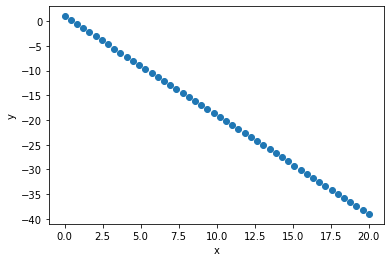

In [4]:
plt.plot(x,y,"o")
plt.xlabel("x")
plt.ylabel("y")

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [5]:
#vectorized implementation to Batch gradient Descent

def vectorized_Batch_Gradient_Descent(X,Y ,alpha=0.001,Max_number_iterations=100):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
   
    #Loop for max no of epochs
    for e in range(Max_number_iterations):
        print("==============================================================")
        print("epoch ",e)
        
    
        #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
       
        Y_predict=theta_0 + theta_1 *X
        Y_predict_list.append(Y_predict)
        #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
        error=Y_predict - Y
        
        cost= (np.dot(error,error))/(2*len(X))
        loss.append(cost)

        print("Cost= " , cost)
        #4.  Calculate gradient of theta_0 and theta_1

        Grad_theta_0=(Y_predict - Y).sum()/(len(X))
        Grad_theta_1=(np.dot((Y_predict-Y),X) )/(len(X))

        #5. Update the parameters (simultaneously).
        theta_0 =theta_0 -alpha*Grad_theta_0

        theta_1= theta_1 -alpha *Grad_theta_1
        
        th0_list.append(theta_0)
        th1_list.append(theta_1)
        
        #stop condition 
        if(e!=0):
            if (abs(loss[e-1]-loss[e])<0.001):
                break
        


    return Y_predict , theta_0 ,theta_1 , loss,th0_list,th1_list
    

#### Try your function with any input parameterss of your choice.

In [6]:
Y_predict , theta_0 ,theta_1 , loss,th0_list,th1_list = vectorized_Batch_Gradient_Descent(x,y,0.001,1000)

epoch  0
Cost=  249.88775510204084
epoch  1
Cost=  186.82544901821947
epoch  2
Cost=  139.68837516021622
epoch  3
Cost=  104.45490187382671
epoch  4
Cost=  78.11898842228953
epoch  5
Cost=  58.43371572199666
epoch  6
Cost=  43.71958378928337
epoch  7
Cost=  32.72122022747044
epoch  8
Cost=  24.50027441454269
epoch  9
Cost=  18.355359342017692
epoch  10
Cost=  13.7622107059909
epoch  11
Cost=  10.328957746061088
epoch  12
Cost=  7.762689631346795
epoch  13
Cost=  5.844464905842495
epoch  14
Cost=  4.410631849965184
epoch  15
Cost=  3.3388660496390457
epoch  16
Cost=  2.537733926791354
epoch  17
Cost=  1.9388918129686958
epoch  18
Cost=  1.4912550069458361
epoch  19
Cost=  1.156639332215653
epoch  20
Cost=  0.9065033409350507
epoch  21
Cost=  0.7195132158124086
epoch  22
Cost=  0.5797226123323643
epoch  23
Cost=  0.47521214916916643
epoch  24
Cost=  0.3970724708856112
epoch  25
Cost=  0.3386441199013128
epoch  26
Cost=  0.29494936515702347
epoch  27
Cost=  0.2622675122555592
epoch  28
Co

In [7]:
print(Y_predict)

[ -0.13037674  -0.9100547   -1.68973267  -2.46941063  -3.24908859
  -4.02876656  -4.80844452  -5.58812248  -6.36780045  -7.14747841
  -7.92715637  -8.70683433  -9.4865123  -10.26619026 -11.04586822
 -11.82554619 -12.60522415 -13.38490211 -14.16458007 -14.94425804
 -15.723936   -16.50361396 -17.28329193 -18.06296989 -18.84264785
 -19.62232581 -20.40200378 -21.18168174 -21.9613597  -22.74103767
 -23.52071563 -24.30039359 -25.08007155 -25.85974952 -26.63942748
 -27.41910544 -28.19878341 -28.97846137 -29.75813933 -30.5378173
 -31.31749526 -32.09717322 -32.87685118 -33.65652915 -34.43620711
 -35.21588507 -35.99556304 -36.775241   -37.55491896 -38.33459692]


#### Calculate r2 score

In [8]:
r2_score(y,Y_predict)

0.9975950054190024

#### Plot loss vs. epochs

Text(0, 0.5, 'loss')

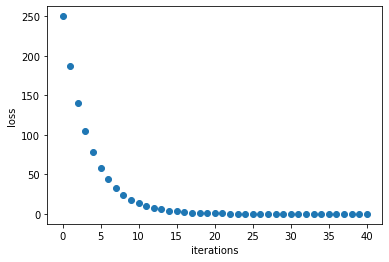

In [9]:
plt.plot(loss,"o")
plt.xlabel("iterations")
plt.ylabel("loss")


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

Text(0, 0.5, 'loss')

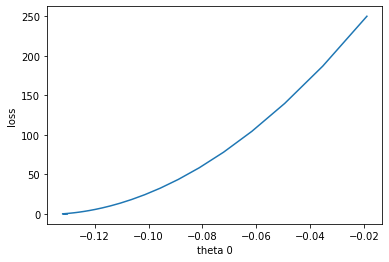

In [11]:
plt.plot(th0_list,loss)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

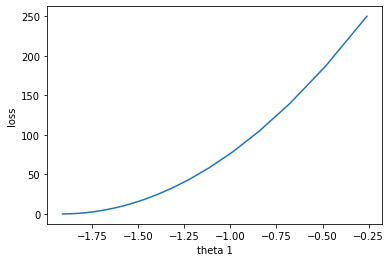

In [12]:
plt.plot(th1_list,loss)
plt.xlabel("theta 1")
plt.ylabel("loss")

#### Plot all regression lines till converge

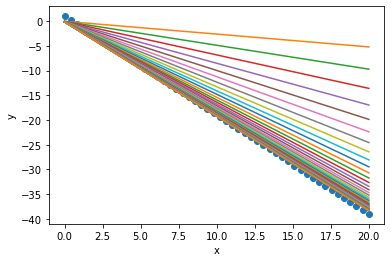

In [13]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(th0_list)):
    plt.plot(x,th0_list[i]+th1_list[i]*x)
    
    
plt.show()



#### Plot the best regression line

Text(0, 0.5, 'y')

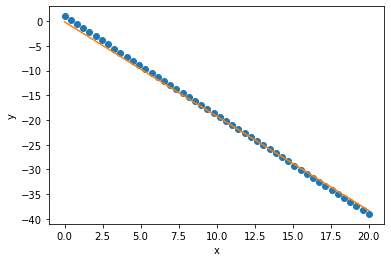

In [14]:
plt.plot(x,y,"o")
plt.plot(x,Y_predict)
plt.xlabel("x")
plt.ylabel("y")

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [15]:
Y_hat , th_0 ,th_1 , l,ths0,ths1 = vectorized_Batch_Gradient_Descent(x,y,0.01,100)

epoch  0
Cost=  249.88775510204084
epoch  1
Cost=  31.527821438771234
epoch  2
Cost=  4.104740105830764
epoch  3
Cost=  0.6601186550646106
epoch  4
Cost=  0.22679212340254964
epoch  5
Cost=  0.1716373537320427
epoch  6
Cost=  0.16397836159451523
epoch  7
Cost=  0.16228778783493517
epoch  8
Cost=  0.16135047568290037


Text(0, 0.5, 'loss')

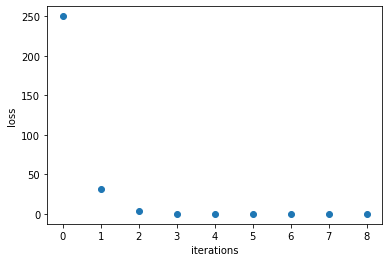

In [16]:
plt.plot(l,"o")
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

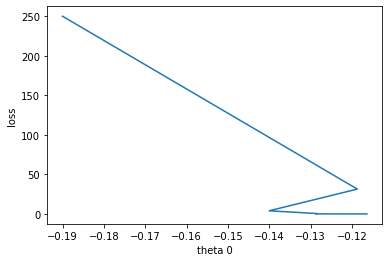

In [17]:
plt.plot(ths0,l)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

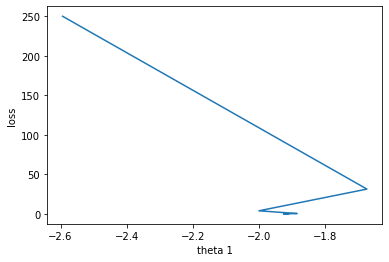

In [18]:
plt.plot(ths1,l)
plt.xlabel("theta 1")
plt.ylabel("loss")

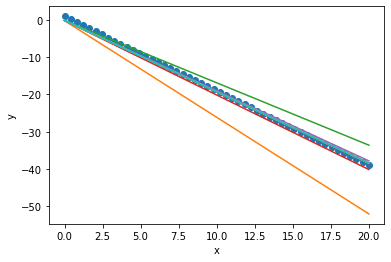

In [19]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(ths0)):
    plt.plot(x,ths0[i]+ths1[i]*x)
    
    
plt.show()

Text(0, 0.5, 'y')

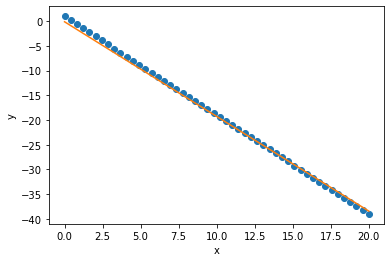

In [20]:
plt.plot(x,y,"o")
plt.plot(x,Y_hat)
plt.xlabel("x")
plt.ylabel("y")

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [21]:
x_mini=np.linspace(0,20)
y_mini=-2*x_mini+1

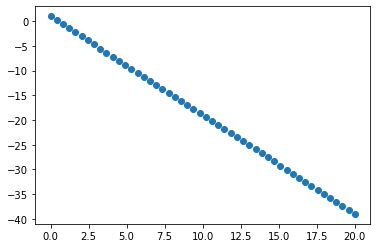

In [22]:
plt.plot(x_mini,y_mini,"o")

In [23]:

def make_batches(batch_size):
    x_batchs=[]
    y_batchs=[]
    for i in range (len(x_mini)//batch_size):
        x_batchs.append(x_mini[i*batch_size: (i+1)*batch_size])
        y_batchs.append(y_mini[i*batch_size: (i+1)*batch_size])
    return x_batchs,y_batchs

In [24]:
#assume the batch size is 5 so we will have 10 batchs

def MiniBatch_GD(X,Y,alpha,Max_no_iterations ,batch_size):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
    x_batchs=[]
    y_batchs=[]
    
    x_batchs,y_batchs=make_batches(batch_size)
    for e in range (Max_no_iterations):
        print("================================================")
        print("epoch " ,e)
        
        
        for i in range (len(x_batchs)):
            
            #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
    
            Y_predict=theta_0 +theta_1 *x_batchs[i]
            
            #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
            
            error=Y_predict - y_batchs[i]
            cost=np.dot(error,error)/(2*batch_size)
            loss.append(cost)
            
            #4.  Calculate gradient of theta_0 and theta_1
            Grad_theta_0=error.sum()/batch_size
            Grad_theta_1=np.dot(error ,x_batchs[i])/batch_size
            
            #5. Update the parameters (simultaneously).
            theta_0 =theta_0 -alpha*Grad_theta_0

            theta_1= theta_1 -alpha *Grad_theta_1
            th0_list.append(theta_0)
            th1_list.append(theta_1)
    
        print("Cost= " , cost)
        Y_predict_list.append(Y_predict)
        
       
        #stop condition 
        if(e!=0):
            if abs(prev_cost - cost)<0.01:
                break
        prev_cost=cost



    return Y_predict_list , theta_0 ,theta_1 , loss,th0_list,th1_list
    


In [25]:
y_predicted , th_0 ,th_1 ,cost,list_th0 ,list_th1 =MiniBatch_GD(x_mini,y_mini, 0.00001, 100,5)

epoch  0
Cost=  685.4228673440324
epoch  1
Cost=  667.3233966251709
epoch  2
Cost=  649.7050055882341
epoch  3
Cost=  632.5548654577512
epoch  4
Cost=  615.8604901261114
epoch  5
Cost=  599.6097269929198
epoch  6
Cost=  583.7907480493502
epoch  7
Cost=  568.3920412009445
epoch  8
Cost=  553.4024018224752
epoch  9
Cost=  538.8109245386682
epoch  10
Cost=  524.606995224741
epoch  11
Cost=  510.7802832208778
epoch  12
Cost=  497.3207337549167
epoch  13
Cost=  484.21856056768354
epoch  14
Cost=  471.46423873554556
epoch  15
Cost=  459.04849768491476
epoch  16
Cost=  446.96231439356325
epoch  17
Cost=  435.1969067737552
epoch  18
Cost=  423.74372723233
epoch  19
Cost=  412.59445640300555
epoch  20
Cost=  401.7409970462924
epoch  21
Cost=  391.1754681125391
epoch  22
Cost=  380.890198963739
epoch  23
Cost=  370.87772374985934
epoch  24
Cost=  361.1307759355533
epoch  25
Cost=  351.6422829732347
epoch  26
Cost=  342.4053611186018
epoch  27
Cost=  333.4133103847961
epoch  28
Cost=  324.6596096

In [26]:
r2_score(y_mini ,th_0+th_1*x_mini )

0.7587177527588016

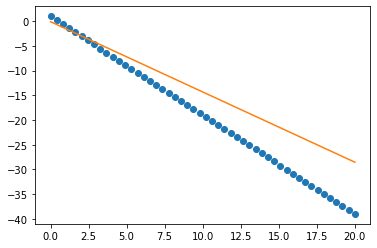

In [27]:
plt.plot(x_mini,y_mini,"o")
plt.plot(x_mini ,th_0+th_1*x_mini)

Text(0, 0.5, 'loss')

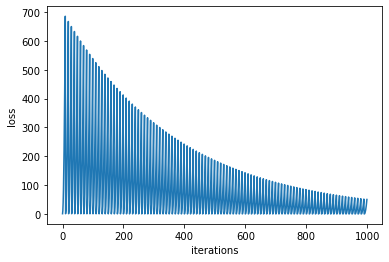

In [28]:
#plot loss vs iterations
plt.plot(np.arange(len(cost)),cost)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

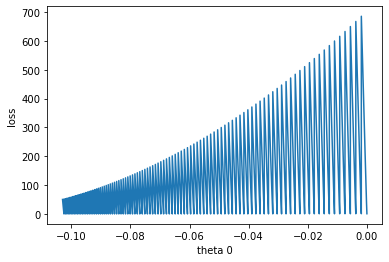

In [30]:
plt.plot(list_th0,cost)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

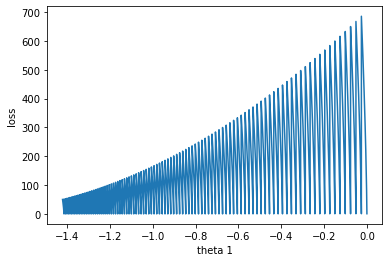

In [31]:
plt.plot(list_th1,cost)
plt.xlabel("theta 1")
plt.ylabel("loss")

## change batch size 

In [32]:
y_pre , th0 ,th1 ,costs,listth0 ,listth1 =MiniBatch_GD(x_mini,y_mini, 0.00001, 100,10)

epoch  0
Cost=  622.5158062943668
epoch  1
Cost=  614.2276060115113
epoch  2
Cost=  606.0503922777863
epoch  3
Cost=  597.9826746225083
epoch  4
Cost=  590.0229826199603
epoch  5
Cost=  582.1698656196163
epoch  6
Cost=  574.4218924799956
epoch  7
Cost=  566.7776513061016
epoch  8
Cost=  559.2357491903962
epoch  9
Cost=  551.7948119572604
epoch  10
Cost=  544.4534839108959
epoch  11
Cost=  537.2104275866207
epoch  12
Cost=  530.0643235055132
epoch  13
Cost=  523.0138699323591
epoch  14
Cost=  516.057782636858
epoch  15
Cost=  509.19479465804426
epoch  16
Cost=  502.4236560718793
epoch  17
Cost=  495.743133761974
epoch  18
Cost=  489.1520111933957
epoch  19
Cost=  482.6490881895238
epoch  20
Cost=  476.2331807119056
epoch  21
Cost=  469.90312064307955
epoch  22
Cost=  463.65775557231956
epoch  23
Cost=  457.49594858426553
epoch  24
Cost=  451.41657805039915
epoch  25
Cost=  445.41853742332626
epoch  26
Cost=  439.50073503382976
epoch  27
Cost=  433.66209389065426
epoch  28
Cost=  427.901

In [33]:
r2_score(y_mini ,th0+th1*x_mini )

0.07025523847360493

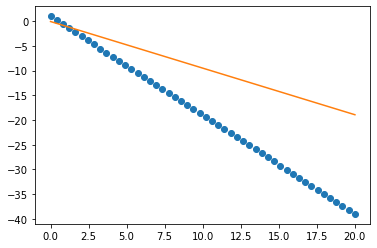

In [34]:
plt.plot(x_mini,y_mini,"o")
plt.plot(x_mini ,th0+th1*x_mini)

Text(0, 0.5, 'loss')

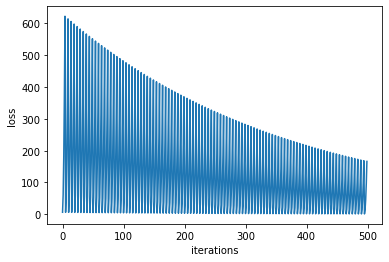

In [35]:
#plot loss vs iterations
plt.plot(np.arange(len(costs)),costs)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

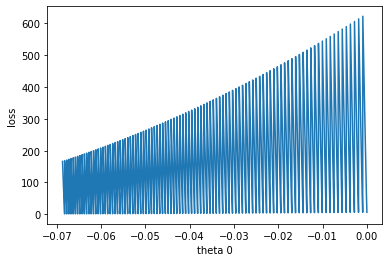

In [36]:
plt.plot(listth0,costs)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

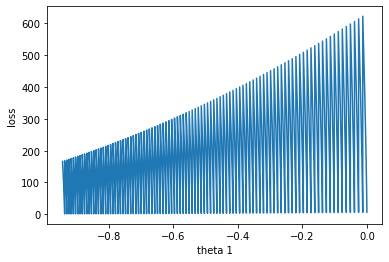

In [37]:
plt.plot(listth1,costs)
plt.xlabel("theta 1")
plt.ylabel("loss")

### With shuffle 

In [38]:
x_mini_shuffled=np.linspace(0,20)
y_mini_shuffled=-2*x_mini_shuffled+1

In [39]:
np.random.shuffle(x_mini_shuffled)
np.random.shuffle(y_mini_shuffled)


In [40]:
yPredicted , th0_shuffled ,th1_shuffled ,costs_list,list_th0_shuffled ,list_th1_shuffled =MiniBatch_GD(x_mini_shuffled,y_mini_shuffled, 0.001, 100,5)

epoch  0
Cost=  81.30839618948308
epoch  1
Cost=  4.480078456753001
epoch  2
Cost=  0.44770107158015016
epoch  3
Cost=  0.13340408677246263
epoch  4
Cost=  0.09061752412837978
epoch  5
Cost=  0.08236033725356338


In [41]:
r2_score(y_mini_shuffled ,th0_shuffled+th1_shuffled*x_mini_shuffled )

-0.886084692648097

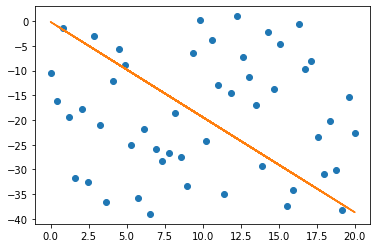

In [42]:
plt.plot(x_mini_shuffled,y_mini_shuffled,"o")
plt.plot(x_mini_shuffled ,th0_shuffled+th1_shuffled*x_mini_shuffled)

Text(0, 0.5, 'loss')

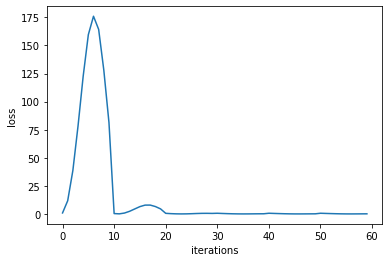

In [43]:
#plot loss vs iterations
plt.plot(np.arange(len(costs_list)),costs_list)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

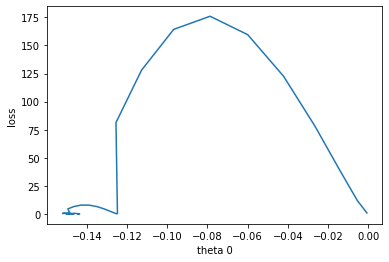

In [44]:
plt.plot(list_th0_shuffled,costs_list)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

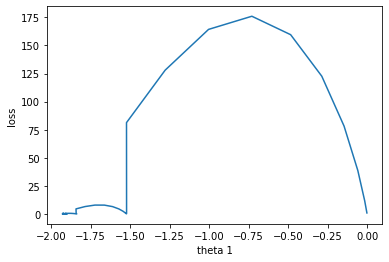

In [45]:
plt.plot(list_th1_shuffled,costs_list)
plt.xlabel("theta 1")
plt.ylabel("loss")

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [46]:
def stochastic_GD(X,Y,alpha,Max_no_iterations):
    # 1.  Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.
    theta_0=0
    theta_1=0
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
    
    for e in range (Max_no_iterations):
        print("================================================")
        print("epoch " ,e)
        
        for i in range (len(X)):
            
            #2. Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
    
            Y_predict=theta_0 +theta_1 *X[i]
            
            #3. Calculate Cost function 𝑱(theta_0,theta_1 ).
            error=Y_predict - Y[i]
            cost=(error**2)/(2)
            loss.append(cost)
            
            #4.  Calculate gradient of theta_0 and theta_1
            Grad_theta_0=error
            Grad_theta_1=error *X[i]
            
            #5. Update the parameters (simultaneously).
            theta_0 =theta_0 -alpha*Grad_theta_0

            theta_1= theta_1 -alpha *Grad_theta_1
            th0_list.append(theta_0)
            th1_list.append(theta_1)
    
        print("Cost= " , cost)
        Y_predict_list.append(Y_predict)
                 
        #stop condition 
        if(e!=0):
            if (abs(loss[(e-1)*len(X)]-loss[e*len(X)])<0.001):
                break



    return Y_predict_list , theta_0 ,theta_1 , loss,th0_list,th1_list
    

In [47]:
Y_predict , t0 ,t1 , losses,t0_list,t1_list=stochastic_GD(x,y,0.0001,1000)

epoch  0
Cost=  214.21025742604553
epoch  1
Cost=  56.7938200533083
epoch  2
Cost=  15.677071402920276
epoch  3
Cost=  4.654473192446179
epoch  4
Cost=  1.5611177939281917
epoch  5
Cost=  0.6270143422833283
epoch  6
Cost=  0.3148492489424965
epoch  7
Cost=  0.19773713423840764


Text(0, 0.5, 'loss')

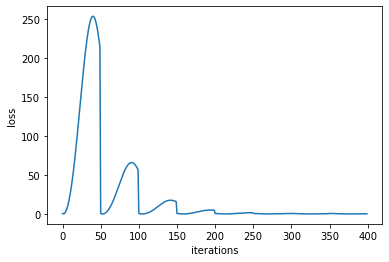

In [48]:
#plot loss vs iterations
plt.plot(losses)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

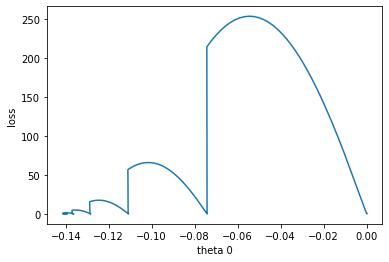

In [49]:
plt.plot(t0_list,losses)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

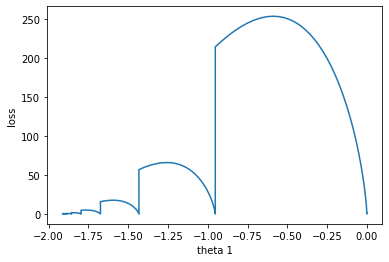

In [50]:
plt.plot(t1_list,losses)
plt.xlabel("theta 1")
plt.ylabel("loss")

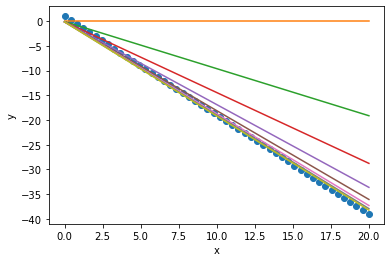

In [51]:
plt.plot(x,y,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(Y_predict)):
    plt.plot(x,t0_list[i*(len(x))]+t1_list[i*(len(x))]*x)
    
    
plt.show()


Text(0, 0.5, 'y')

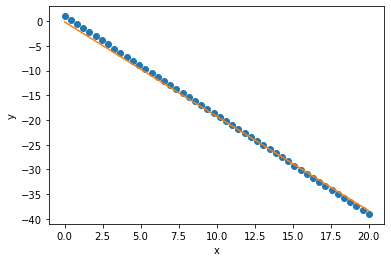

In [52]:
plt.plot(x,y,"o")
plt.plot(x,t0+t1*x)
plt.xlabel("x")
plt.ylabel("y")

In [53]:
r2_score(y,t0+t1*x)

0.9975797730384957

## Try with shuffle

In [54]:
x_new=np.linspace(0,20)
y_new=-2*x_new+1

In [55]:
np.random.shuffle(x_new)
np.random.shuffle(y_new)


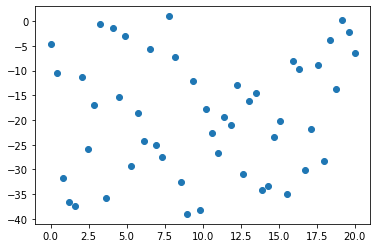

In [56]:
plt.scatter(x_new,y_new)

In [57]:
y_hat , t_0 ,t_1 , loss_list,t0List,t1List=stochastic_GD(x_new,y_new,0.001,1000)

epoch  0
Cost=  169.23893596520972
epoch  1
Cost=  168.0824755082849
epoch  2
Cost=  166.78418063485728
epoch  3
Cost=  165.50753908127447
epoch  4
Cost=  164.25220902372087
epoch  5
Cost=  163.01779147954986
epoch  6
Cost=  161.80389577036252
epoch  7
Cost=  160.6101393591474
epoch  8
Cost=  159.43614766565196
epoch  9
Cost=  158.2815538861697
epoch  10
Cost=  157.14599881764397
epoch  11
Cost=  156.0291306859813
epoch  12
Cost=  154.9306049784699
epoch  13
Cost=  153.85008428020285
epoch  14
Cost=  152.7872381144055
epoch  15
Cost=  151.74174278657216
epoch  16
Cost=  150.7132812323167
epoch  17
Cost=  149.7015428688464
epoch  18
Cost=  148.70622344996917
epoch  19
Cost=  147.727024924547
epoch  20
Cost=  146.76365529831105
epoch  21
Cost=  145.8158284989552
epoch  22
Cost=  144.88326424442798
epoch  23
Cost=  143.96568791434242
epoch  24
Cost=  143.0628304244306
epoch  25
Cost=  142.1744281039638
epoch  26
Cost=  141.30022257606885
epoch  27
Cost=  140.43996064086787
epoch  28
Cost=

Cost=  93.54168290539184
epoch  147
Cost=  93.39460835062447
epoch  148
Cost=  93.24954830917824
epoch  149
Cost=  93.10647382753672
epoch  150
Cost=  92.96535640128677
epoch  151
Cost=  92.82616796739002
epoch  152
Cost=  92.6888808966053
epoch  153
Cost=  92.55346798605535
epoch  154
Cost=  92.41990245193844
epoch  155
Cost=  92.28815792237812
epoch  156
Cost=  92.15820843041122
epoch  157
Cost=  92.03002840710874
epoch  158
Cost=  91.903592674829
epoch  159
Cost=  91.77887644059807
epoch  160
Cost=  91.65585528961685
epoch  161
Cost=  91.5345051788904
epoch  162
Cost=  91.4148024309781
epoch  163
Cost=  91.29672372786152
epoch  164
Cost=  91.1802461049279
epoch  165
Cost=  91.06534694506614
epoch  166
Cost=  90.95200397287394
epoch  167
Cost=  90.84019524897292
epoch  168
Cost=  90.72989916442985
epoch  169
Cost=  90.62109443528196
epoch  170
Cost=  90.51376009716364
epoch  171
Cost=  90.4078755000325
epoch  172
Cost=  90.3034203029937
epoch  173
Cost=  90.2003744692189
epoch  174
C

epoch  312
Cost=  83.74291538402683
epoch  313
Cost=  83.72685570826066
epoch  314
Cost=  83.71100512458064
epoch  315
Cost=  83.69536089154393
epoch  316
Cost=  83.67992030413903
epoch  317
Cost=  83.6646806932889
epoch  318
Cost=  83.64963942536228
epoch  319
Cost=  83.63479390169047
epoch  320
Cost=  83.62014155809247
epoch  321
Cost=  83.60567986440533
epoch  322
Cost=  83.59140632402286
epoch  323
Cost=  83.57731847343932
epoch  324
Cost=  83.56341388180044
epoch  325
Cost=  83.54969015046088
epoch  326
Cost=  83.53614491254717
epoch  327
Cost=  83.52277583252757
epoch  328
Cost=  83.50958060578803
epoch  329
Cost=  83.4965569582132
epoch  330
Cost=  83.48370264577443
epoch  331
Cost=  83.47101545412309
epoch  332
Cost=  83.45849319818929
epoch  333
Cost=  83.44613372178682
epoch  334
Cost=  83.43393489722344
epoch  335
Cost=  83.4218946249163
epoch  336
Cost=  83.41001083301315
epoch  337
Cost=  83.3982814770188
epoch  338
Cost=  83.38670453942635
epoch  339
Cost=  83.37527802935

epoch  535
Cost=  82.57279154639419
epoch  536
Cost=  82.57191510867557
epoch  537
Cost=  82.5710500040463
epoch  538
Cost=  82.57019608590164
epoch  539
Cost=  82.56935320953467
epoch  540
Cost=  82.56852123211232
epoch  541
Cost=  82.5677000126501
epoch  542
Cost=  82.56688941198885
epoch  543
Cost=  82.56608929277073
epoch  544
Cost=  82.56529951941612
epoch  545
Cost=  82.56451995810033
epoch  546
Cost=  82.56375047673099
epoch  547
Cost=  82.56299094492549
epoch  548
Cost=  82.56224123398893
epoch  549
Cost=  82.56150121689221
epoch  550
Cost=  82.56077076825042
epoch  551
Cost=  82.56004976430145
epoch  552
Cost=  82.55933808288515
epoch  553
Cost=  82.55863560342249
epoch  554
Cost=  82.55794220689482
epoch  555
Cost=  82.55725777582417
epoch  556
Cost=  82.55658219425273
epoch  557
Cost=  82.55591534772356
epoch  558
Cost=  82.55525712326087
epoch  559
Cost=  82.55460740935104
epoch  560
Cost=  82.55396609592351
epoch  561
Cost=  82.55333307433223
epoch  562
Cost=  82.552708237

Text(0, 0.5, 'loss')

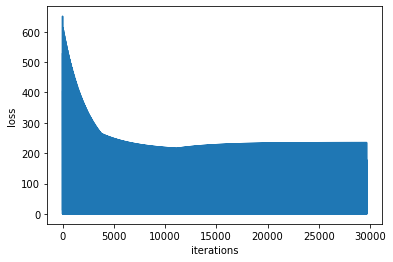

In [58]:
#plot loss vs iterations
plt.plot(loss_list)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

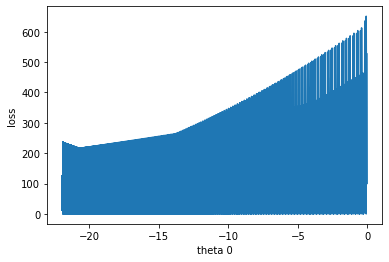

In [59]:
plt.plot(t0List,loss_list)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

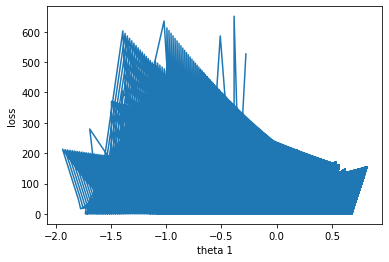

In [60]:
plt.plot(t1List,loss_list)
plt.xlabel("theta 1")
plt.ylabel("loss")

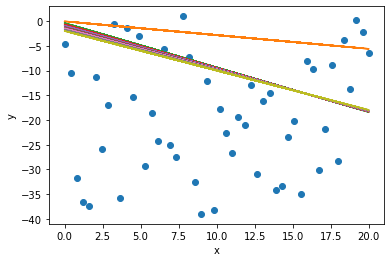

In [61]:
plt.plot(x_new,y_new,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(Y_predict)):
    plt.plot(x_new,t0List[i*(len(x_new))]+t1List[i*(len(x_new))]*x_new)
    
    
plt.show()

Text(0, 0.5, 'y')

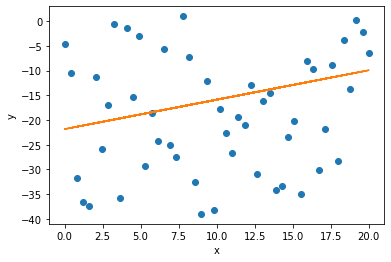

In [62]:
plt.plot(x_new,y_new,"o")
plt.plot(x_new,t_0+t_1*x_new)
plt.xlabel("x")
plt.ylabel("y")

In [63]:
r2_score(y_new,t_0+t_1*x_new)

-0.08801875022502137